<a href="https://colab.research.google.com/github/AzlinRusnan/Python-Coding/blob/main/Data_Science_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Python Odyssey into Video Game Ratings and Reviews**

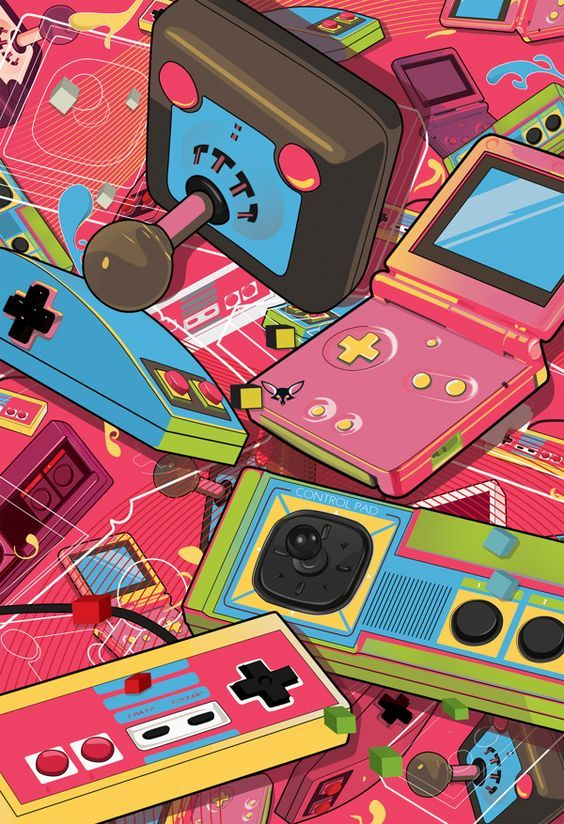

## **Introduction: Decoding the Digital Playground**

Imagine a world where you can step into fantastical realms, go on thrilling adventures, and become part of epic stories—all from the comfort of your screen. This isn't just about playing games; it's about embarking on digital journeys that rival the best books and movies. Welcome to the world of video games, where pixels come to life, and the possibilities are endless.

In this incredible realm, video games aren't just lines of code; they are like treasure chests filled with experiences waiting to be unlocked. Millions of people immerse themselves in these virtual adventures, and as they do, the world of gaming has become a cultural and economic powerhouse.

Our journey begins with Python as our guide, navigating a vast dataset of video game ratings. We'll explore meta scores and user reviews, different gaming platforms, and the experiences they offer. Through the art of Exploratory Data Analysis, we'll uncover the secrets that make some games legendary and find out which platforms deliver the best adventures.

As we dive into the data, each visualization is like unlocking a new level, revealing stories hidden within the scores and opinions. We'll compare the retro charm of the Nintendo 64 with the cutting-edge excitement of the PlayStation 5, discovering how user reviews and professional ratings align or diverge. Along the way, we'll spot trends, outliers, and surprises that might hint at the ever-changing tastes of gamers and the industry's critical standards.

Come join me as i will embark on a quest to decode the digital playground, using Python's analytical powers to transform complex data into fascinating insights. This isn't just an analysis; it's a tribute to the vibrant gaming culture and the shared adventures it creates.

### **Inspiration**
I'm inspired to work on this video game project, fueled by my 5-year-old son's tales of epic gaming adventures from Ryan's YouTube channel.


---



### **About the Dataset**
The source of the data is from https://www.kaggle.com/datasets/thedevastator/video-game-ratings-and-reviews-dataset

This comprehensive dataset is contained meticulously compiled collection that contains in-depth information on an extension range of video games.

######**Understanding the Data Fields:**


1.   name: This is the title of the video game.
2.   platform: This refers to the gaming console or system where you can play that particular game.
3.   release_date: It indicates when the game was officially released.
4.   summary: It gives a quick synopsis or description of what all antics does a particular game entail.
5.   meta_score: This is an aggregated score compiled from professional critic reviews, typically ranged between 0 - 100.
6.   user_review: These are actual comments given by players who have played these games.


---



### **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **Load Data**

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
file_path = '/content/gdrive/My Drive/game/all_games.csv'
gm_df = pd.read_csv(file_path)

## **Data Exploration**
**Let's have a glimpse of the dataset**

In [6]:
gm_df.head().style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

In [7]:
print("Dataset Information:\n")
gm_df.info()
print("\n", gm_df.shape[0], "rows and", gm_df.shape[1], "columns in the dataset.")

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         18800 non-null  int64 
 1   name          18800 non-null  object
 2   platform      18800 non-null  object
 3   release_date  18800 non-null  object
 4   summary       18686 non-null  object
 5   meta_score    18800 non-null  int64 
 6   user_review   18800 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB

 18800 rows and 7 columns in the dataset.


**Checking for missing values, irrelavant data and data types**

In [8]:
print("Null values of the dataset :")
gm_df.isnull().sum().to_frame().T.style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

Null values of the dataset :


In [9]:
print("Data Types of the dataset:")
display(gm_df.dtypes.to_frame().T.style.set_properties(**{"background-color": "#f5f5dc", "color": "black", "border": "1.5px solid black"}))

Data Types of the dataset:


In [10]:
print("Checking for irrelevant entries :\n")
print(gm_df["user_review"].unique())

Checking for irrelevant entries :

['9.1' '7.4' '7.7' '8.4' '7.9' '8.0' '8.3' '6.2' '8.7' '7.5' '8.8' '8.5'
 '8.6' '8.9' '8.2' '9.2' '7.8' '9.0' '9.3' '8.1' '6.8' '7.6' '6.9' '6.6'
 '7.3' '7.2' '9.4' '5.7' '6.0' '5.8' '7.1' '3.3' '5.0' '5.5' '6.5' '5.9'
 '6.7' '3.8' '6.4' '7.0' '6.3' '4.9' 'tbd' '5.3' '3.5' '4.7' '6.1' '4.8'
 '4.1' '5.6' '4.4' '5.4' '4.6' '3.1' '5.2' '4.3' '1.8' '4.5' '5.1' '4.2'
 '4.0' '9.7' '3.2' '2.9' '2.1' '2.4' '3.4' '3.0' '3.7' '2.2' '2.6' '2.7'
 '2.5' '2.8' '3.9' '2.0' '9.6' '1.5' '3.6' '1.4' '1.2' '0.9' '1.9' '1.1'
 '1.7' '0.8' '1.0' '0.6' '2.3' '0.5' '1.6' '0.2' '0.7' '1.3']


In [11]:
duplicate_rows = gm_df.duplicated().sum()
print("There is", duplicate_rows, "duplicate row in the dataset")

There is 0 duplicate row in the dataset


Issues with dataset:

---



1.  Missing Values: The *summary* column has 114 missing values. Other columns have no missing values.

2.   Data Types:

    *   The index and meta_score columns are correctly typed as integers.
    *   The *name*, *platform*, and *summary* columns are of object type (likely strings), which is appropriate.
    *   The *release_date* is of object type but should ideally be converted to a datetime format for better analysis.
    *   The *user_review* is of object type, which might need conversion to a numeric type for analysis, depending on its content.
3. *'tbd'* - to be determined in user_review

Planning:


---



1.   Opt to leave the missing values in summary since the summary text is not critical for numerical analysis
2.   Convert release_date to datetime format
3.   Convert user_review to float
4.   'tbd' opt to change to NaN as 'tbd' indicates that a review scores is not available at the time of data collection. Treating it as 'Nan' ensure that the statistical calculation accurately reflect only the existing score.












**Data Cleaning**

In [12]:
# Converting release_date to datetime format
gm_df['release_date'] = pd.to_datetime(gm_df['release_date'], errors='coerce')

In [13]:
# Replace the tbd in user_review with NaN
gm_df['user_review'] = pd.to_numeric(gm_df['user_review'], errors='coerce')

print("After changing the irrelevant entries to NaN, the user_review are :\n")
print(gm_df["user_review"].unique())

After changing the irrelevant entries to NaN, the user_review are :

[9.1 7.4 7.7 8.4 7.9 8.  8.3 6.2 8.7 7.5 8.8 8.5 8.6 8.9 8.2 9.2 7.8 9.
 9.3 8.1 6.8 7.6 6.9 6.6 7.3 7.2 9.4 5.7 6.  5.8 7.1 3.3 5.  5.5 6.5 5.9
 6.7 3.8 6.4 7.  6.3 4.9 nan 5.3 3.5 4.7 6.1 4.8 4.1 5.6 4.4 5.4 4.6 3.1
 5.2 4.3 1.8 4.5 5.1 4.2 4.  9.7 3.2 2.9 2.1 2.4 3.4 3.  3.7 2.2 2.6 2.7
 2.5 2.8 3.9 2.  9.6 1.5 3.6 1.4 1.2 0.9 1.9 1.1 1.7 0.8 1.  0.6 2.3 0.5
 1.6 0.2 0.7 1.3]


In [14]:
# Converting user_review to float
gm_df["user_review"] = gm_df["user_review"].astype(float)

In [15]:
print("After converting the data types :")
gm_df.dtypes.to_frame().T.style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

After converting the data types :


****Dataset Summary****

In [16]:
print(f'Total entries for platform is {gm_df["platform"].shape[0]}\n')
print(f'Total number of unique brands is {len(gm_df["platform"].unique())}. They are :\n')
gm_df["platform"].unique()

Total entries for platform is 18800

Total number of unique brands is 22. They are :



array([' Nintendo 64', ' PlayStation', ' PlayStation 3', ' Dreamcast',
       ' Xbox 360', ' Wii', ' Xbox One', ' PC', ' Switch',
       ' PlayStation 2', ' PlayStation 4', ' GameCube', ' Xbox', ' Wii U',
       ' Game Boy Advance', ' 3DS', ' Xbox Series X', ' DS',
       ' PlayStation Vita', ' PlayStation 5', ' PSP', ' Stadia'],
      dtype=object)

In [17]:
print("Entries for each platform :")
gm_df["platform"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

Entries for each platform :


**Insights** :

*   There are 22 platforms who that most people play on.
*   Pc is the most played on platform followed by PlayStation4, Xbox360 and others.

In [18]:
print(f'Total entries for video game is {gm_df["name"].shape[0]}\n')
print(f'Total number of video game is {len(gm_df["name"].unique())}. They are :\n')
gm_df["name"].unique()

Total entries for video game is 18800

Total number of video game is 12254. They are :



array(['The Legend of Zelda: Ocarina of Time', "Tony Hawk's Pro Skater 2",
       'Grand Theft Auto IV', ..., 'Drake of the 99 Dragons',
       'Afro Samurai 2: Revenge of Kuma Volume One',
       'Infestation: Survivor Stories (The War Z)'], dtype=object)

In [19]:
gm_df["name"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#f5f5dc","color":"black","border": "1.5px  solid black"})

**Insights** :

*   There are 12254 video games that most people play.
*   Cars and Madden NFL 07 is the most played video game followed by Madden NFL 06 and others.

## **Visualization Quest: Illuminating the Game Universe Through Data**

### **Custom Pallete for Visualisation**

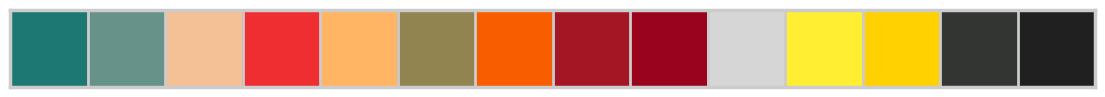

In [20]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)
pal = ["#5f0f40","#9a031e","#fb8b24","#e36414","#0f4c5c","#FFC300"]
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]
palette_cmap = ["#679289","#ffd100","#1d7874","#f4c095","#ee2e31"]
sns.palplot(sns.color_palette(palette))
plt.show()

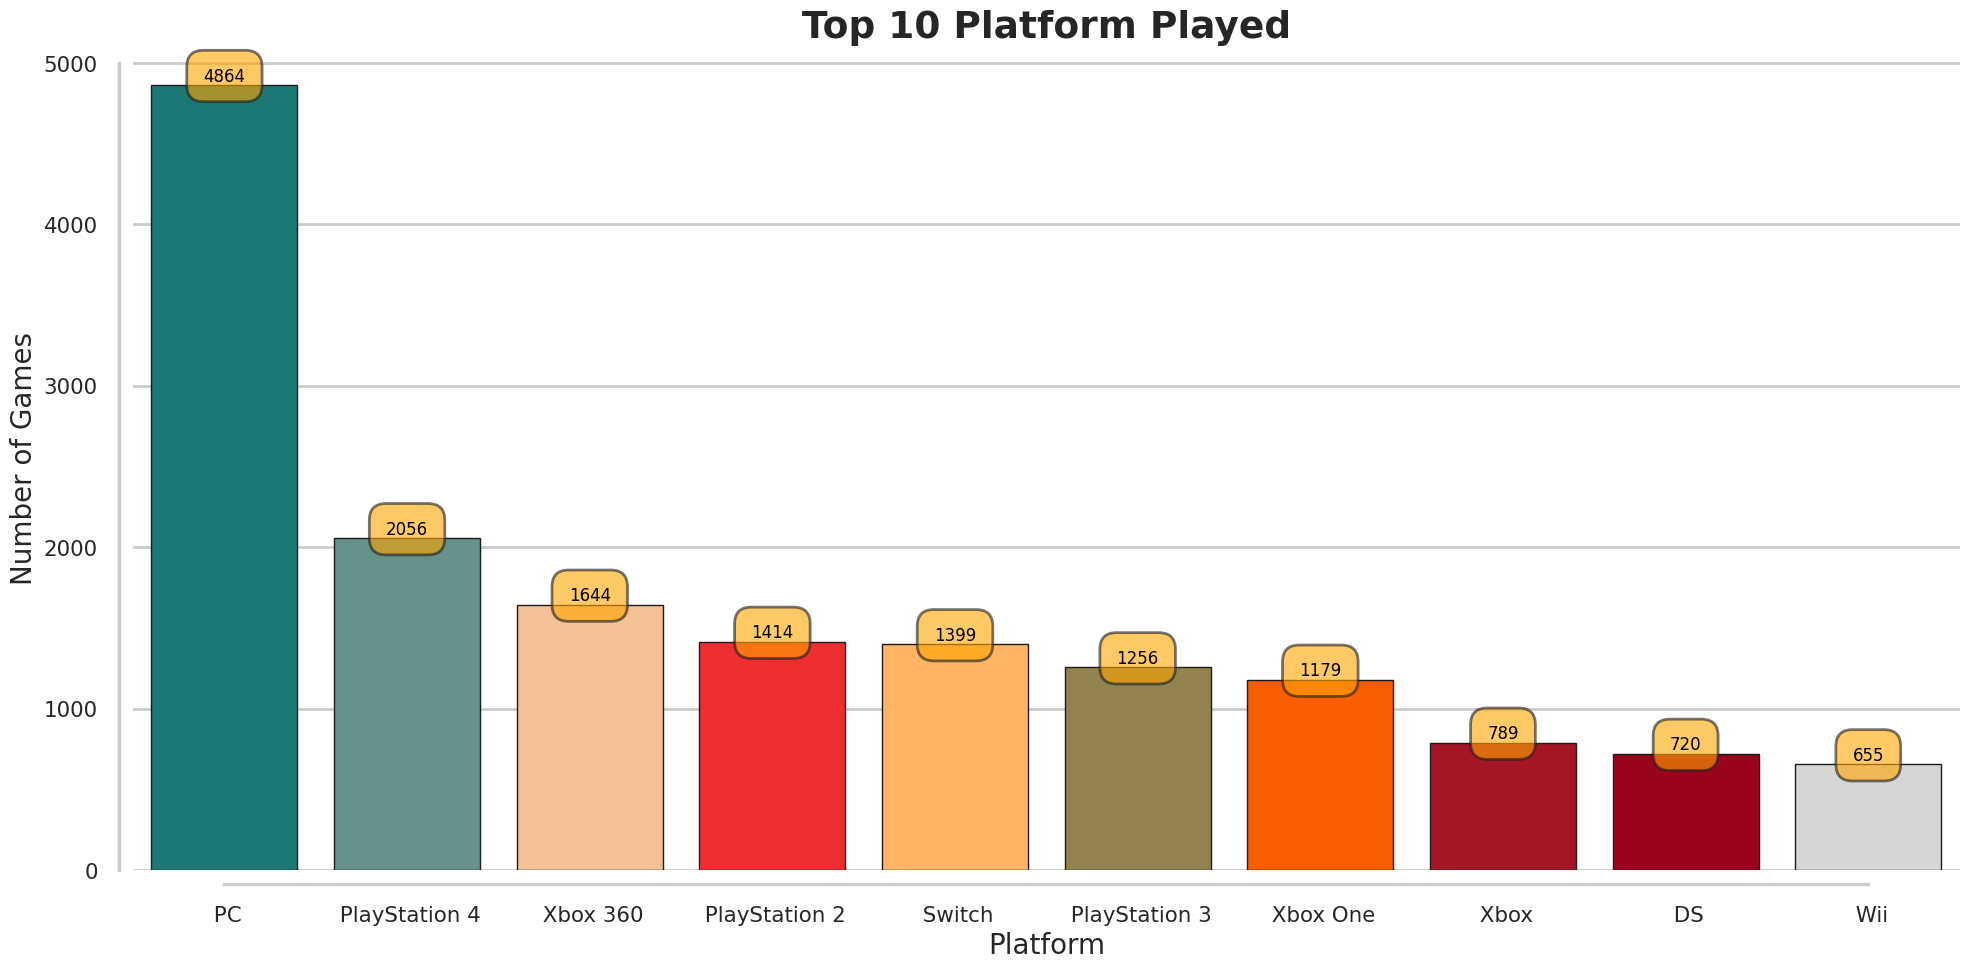

In [21]:
# Top 10 platforms
plt.figure(figsize=(20, 10))
order = gm_df["platform"].value_counts().index[:10]
p = sns.countplot(
    x=gm_df["platform"],
    order=order,
    palette=palette[:10],  # Use the first 10 colors from the provided palette
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=1
)
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right', fontsize=14)
p.set_yticklabels([f'{int(y)}' for y in p.get_yticks()], size=12)
p.set_title("Top 10 Platform Played", fontsize=27,fontweight='bold')
p.set_xlabel("Platform", fontsize=20)
p.set_ylabel("Number of Games", fontsize=20)
for container in p.containers:
    p.bar_label(container, fontsize=12, color='black', rotation=0,
                bbox=dict(boxstyle="round", pad=1.0, facecolor="orange", edgecolor="#1c1c1c", linewidth=2, alpha=0.6))
sns.despine(trim=True, offset=10)
plt.tight_layout()
plt.show()


**Insights** :

*   *PC* shows the highest number of most user played game on. Mainly because of its versatility. PCs can run a wide range of games and not limited to exclusives like some consoles. Also, PCs can be upgraded over time to meet the system requirements.

*   *Wii* on the other hand, is an older generation console and its hardware is less powerful compared to the other consoles like PlayStation 4 or Xbox One.
It's worth noting that despite these reasons, the Wii was remarkably successful during its time and had a significant impact on the gaming industry with its innovative motion controls and broad appeal.

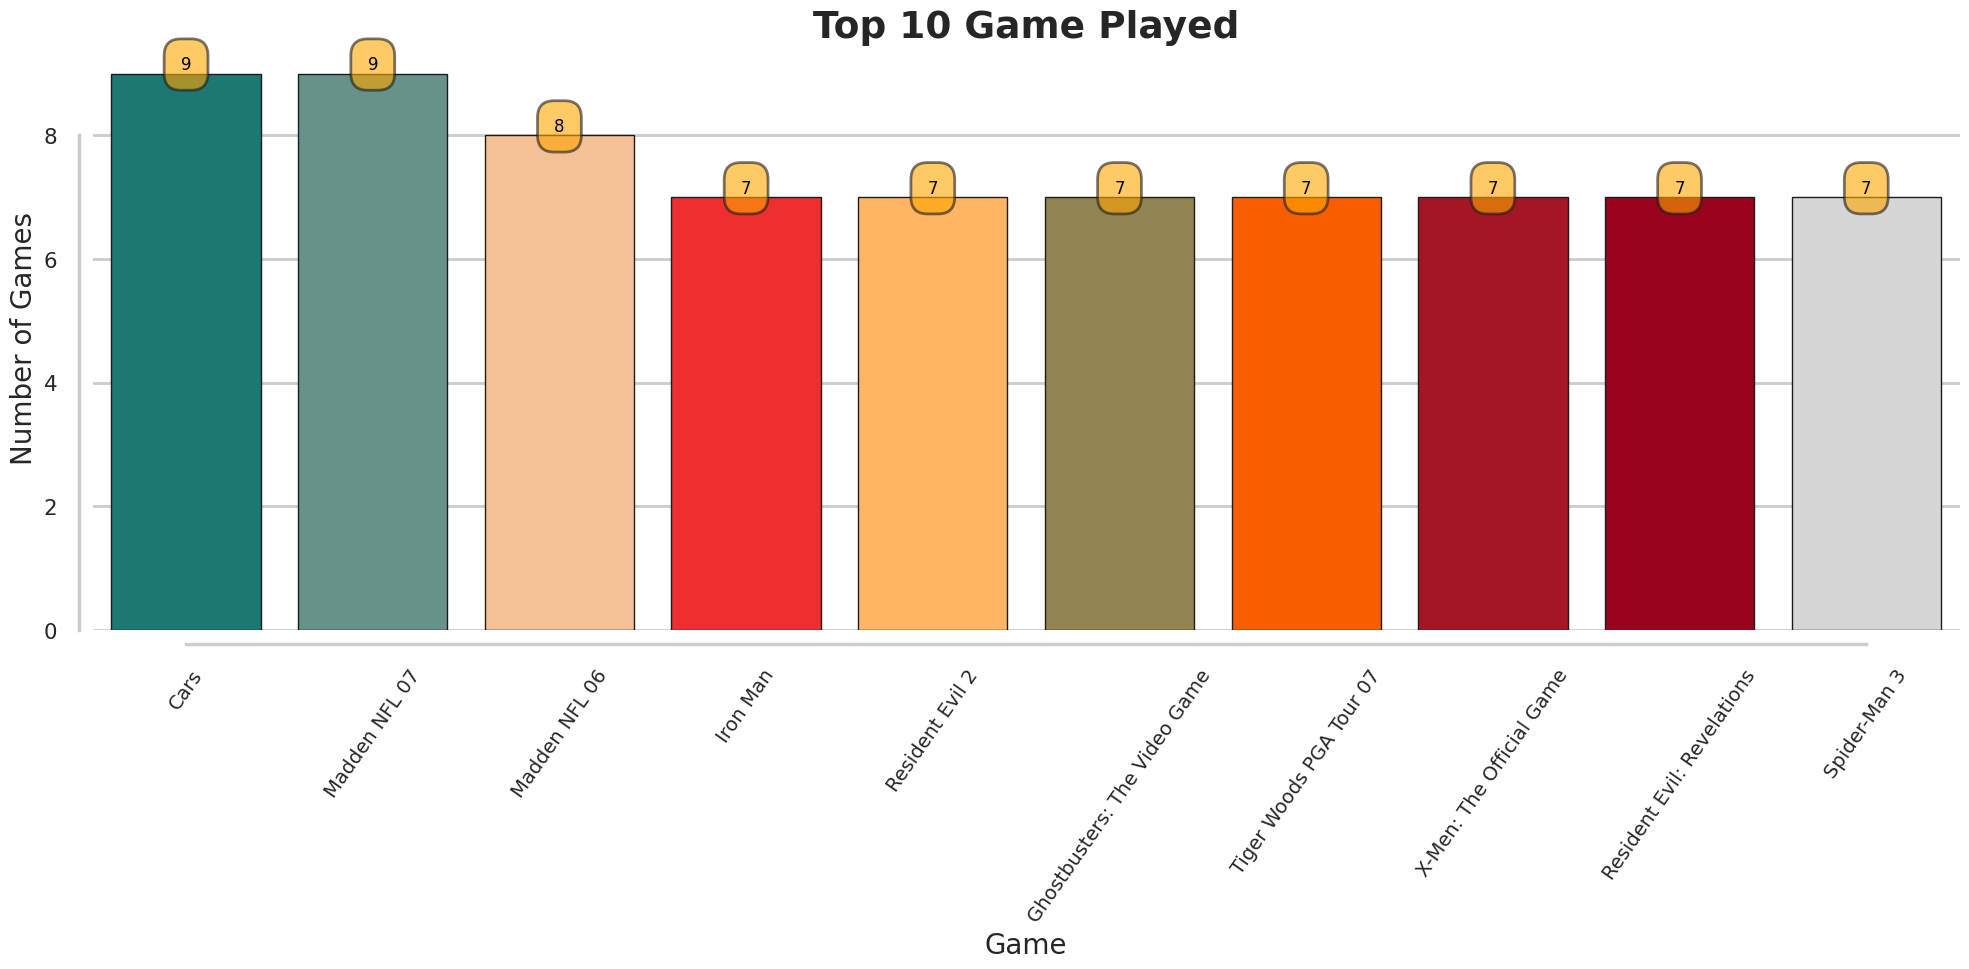

In [22]:
# Top 10 game played
plt.figure(figsize=(20, 10))
order = gm_df["name"].value_counts().index[:10]
p = sns.countplot(
    x=gm_df["name"],
    order=order,
    palette=palette[:10],
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=1
)

p.set_title("Top 10 Game Played", fontsize=27, fontweight='bold')
p.set_xlabel("Game", fontsize=20)
p.set_ylabel("Number of Games", fontsize=20)

for container in p.containers:
    p.bar_label(container, fontsize=12, color='black', rotation=0,
                 bbox=dict(boxstyle="round", pad=1.0, facecolor="orange", edgecolor="#1c1c1c", linewidth=2, alpha=0.6))

sns.despine(trim=True, offset=10)

# Rotate labels after the plot has been fully rendered
plt.draw()
plt.setp(p.get_xticklabels(), rotation=55, ha='center', fontsize=14)

plt.tight_layout()
plt.show()


**Insights** :

*   *Cars* shows the highest number game user played. Mainly because it serves as a game based on a family movie, "Cars" likely appeals to a wide age range, from children to adults. Family-friendly games can be more frequently played due to their appeal to multiple members within a household.


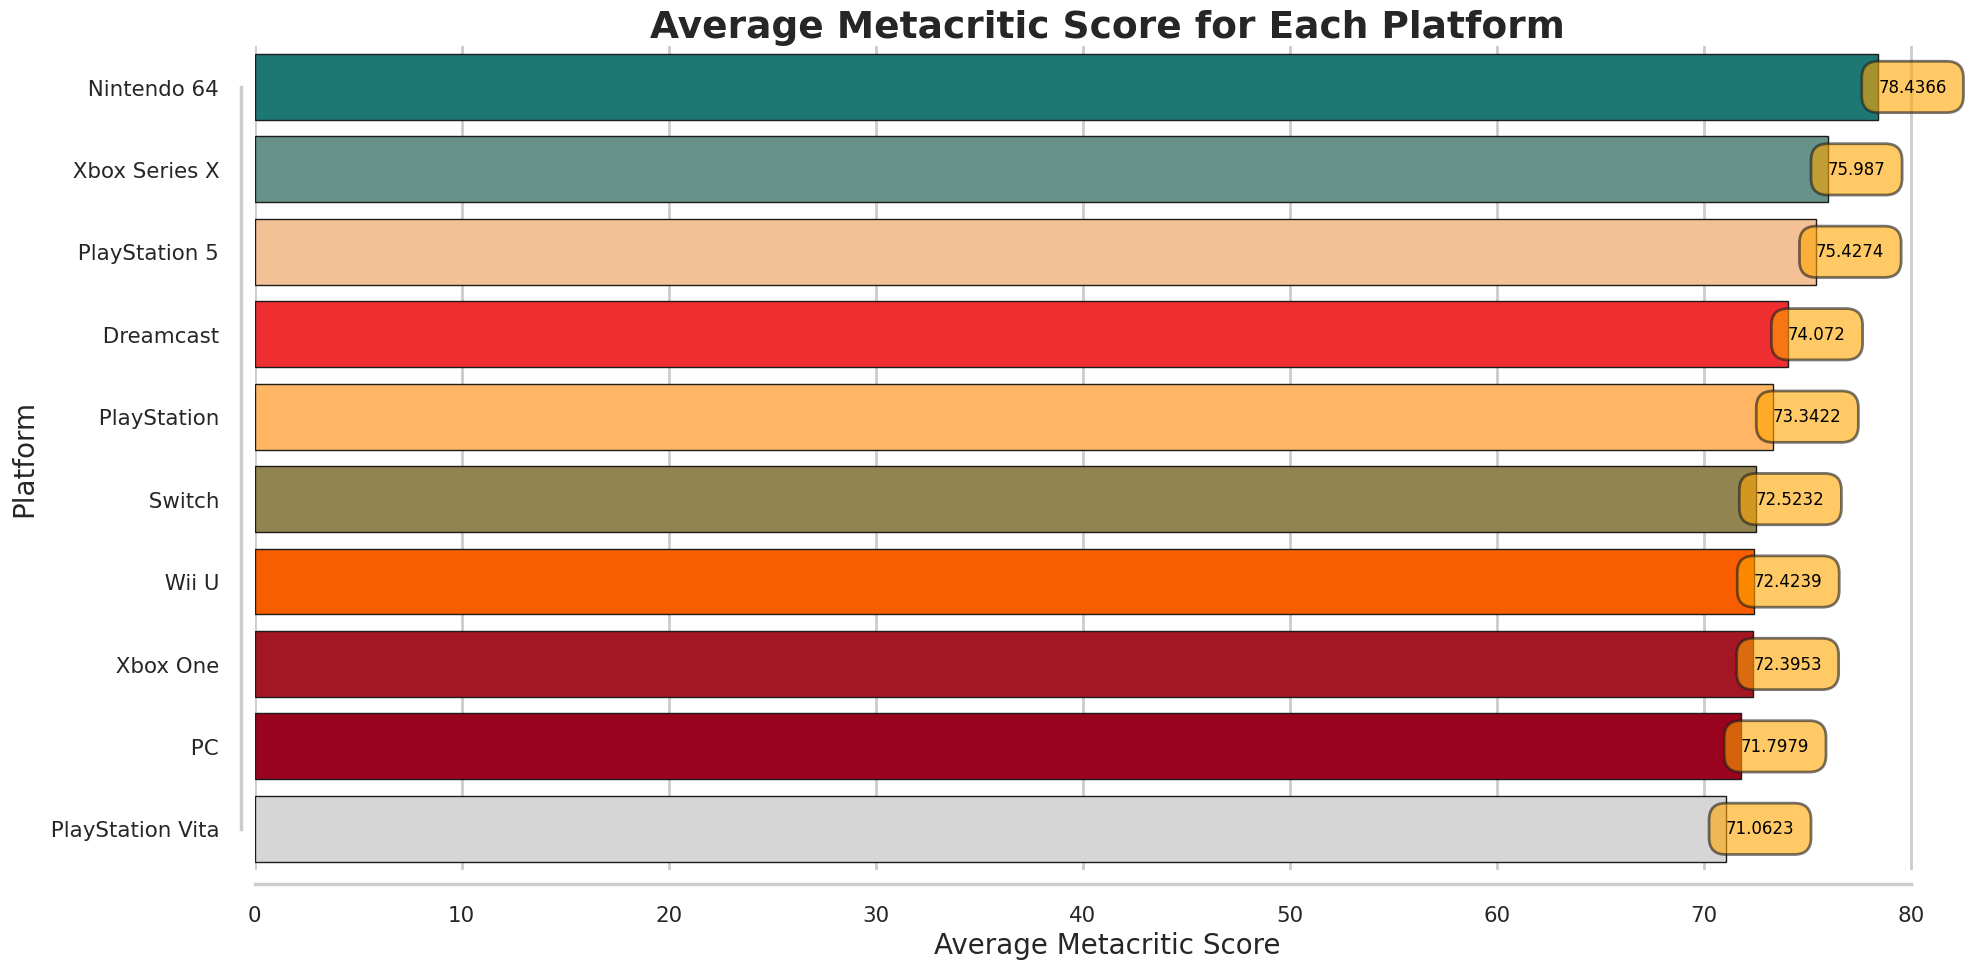

In [23]:
# Average metascore by platform
plt.figure(figsize=(20, 10))

# Calculating the average meta_score for each platform and sorting
order = gm_df.groupby('platform')['meta_score'].mean().sort_values(ascending=False).index[:10]
avg_scores = gm_df.groupby('platform')['meta_score'].mean().sort_values(ascending=False).values[:10]

# Creating the bar plot
p = sns.barplot(
    x=avg_scores,
    y=order,
    palette=palette[:10],  # Use the first 10 colors from the provided palette
    saturation=1,
    edgecolor="#1c1c1c",
    linewidth=1
)

# Customizing labels and title
p.set_xticklabels([f'{int(x)}' for x in p.get_xticks()], fontsize=14)
p.set_yticklabels(order, rotation=0, fontsize=12)
p.set_title("Average Metacritic Score for Each Platform", fontsize=27, fontweight='bold')
p.set_xlabel("Average Metacritic Score", fontsize=20)
p.set_ylabel("Platform", fontsize=20)

# Adding labels to each bar
for container in p.containers:
    p.bar_label(container, fontsize=12, color='black', rotation=0,
                bbox=dict(boxstyle="round", pad=1.0, facecolor="orange", edgecolor="#1c1c1c", linewidth=2, alpha=0.6))

# Additional styling
sns.despine(trim=True, offset=10)
plt.tight_layout()
plt.show()

**Insights** :

* Nintendo 64 is the top of this chart tend to have higher-rated games. This could be due to a variety of factors like the target audience, the type of games popular on these platforms, or the quality control measures of the platform holders.

* According to Google search, Nintendo 64 comes with four controller ports which sleepover and hangouts with large groups of friends and family member became fun!




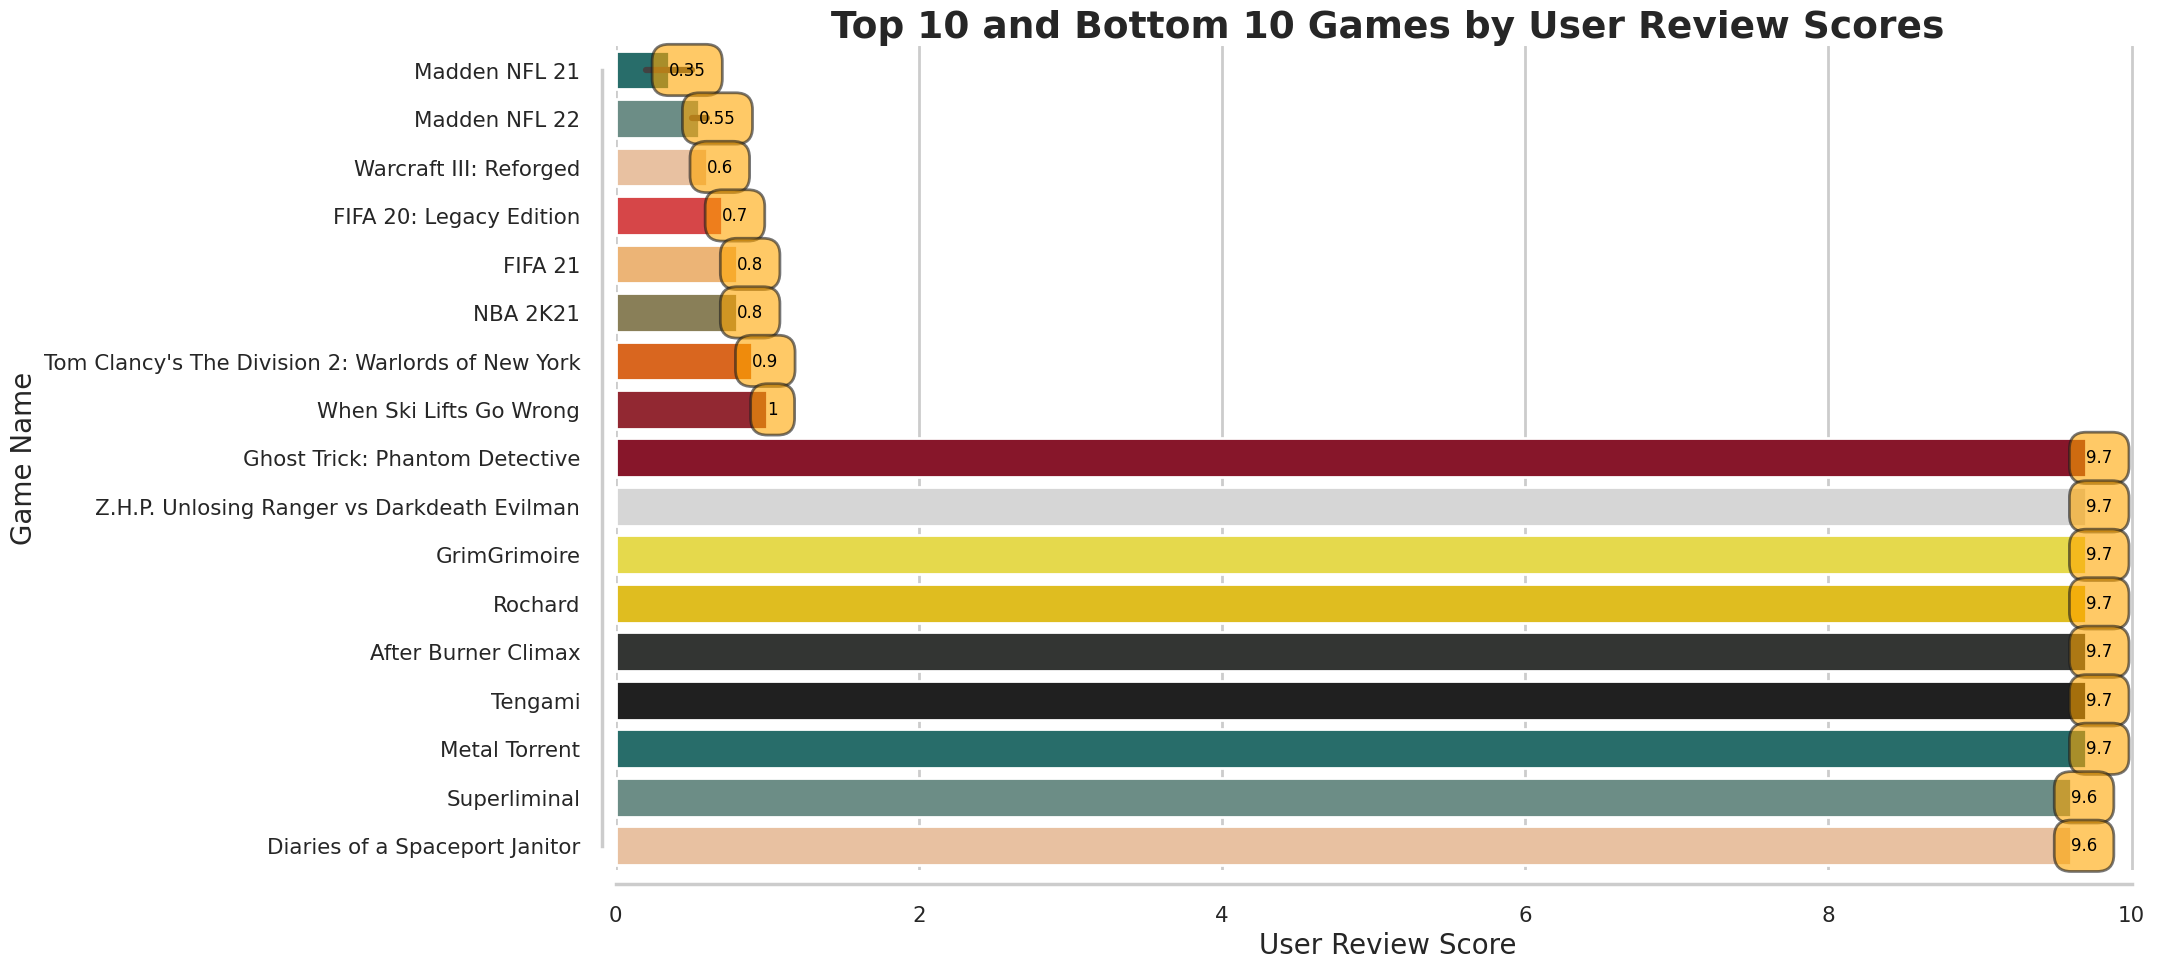

In [24]:
# Top and Bottom 10 of Games by User Reviews
top_10 = gm_df.nlargest(10, 'user_review')[['name', 'user_review']]
bottom_10 = gm_df.nsmallest(10, 'user_review')[['name', 'user_review']]
combined_data = pd.concat([bottom_10, top_10])

# Creating the bar plot
plt.figure(figsize=(22, 10))
#palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]
p = sns.barplot(
    y='name',
    x='user_review',
    data=combined_data,
    palette=palette[:20]  # Adjust the palette as needed
)

# Setting plot title and labels
p.set_title("Top 10 and Bottom 10 Games by User Review Scores", fontsize=27, fontweight='bold')
p.set_xlabel("User Review Score", fontsize=20)
p.set_ylabel("Game Name", fontsize=20)

# Adding labels to each bar
for container in p.containers:
    p.bar_label(container, fontsize=12, color='black', rotation=0,
                bbox=dict(boxstyle="round", pad=1.0, facecolor="orange", edgecolor="#1c1c1c", linewidth=2, alpha=0.6))

# Additional styling
sns.despine(trim=True, offset=10)
plt.tight_layout()
plt.show()

**Insights** :

* According to Forbes (https://www.forbes.com/sites/brianmazique/2020/08/30/madden-21-has-historically-low-review-scores-whats-wrong-with-the-game/?sh=4e0373914b47), Madden NFL 21 got the lowest review as the concept are stagnant or underdeveloped.
* While Ghost Trick: Phantom Detective Video game got the highest reviews and the game was nominated for several industry awards, including Game of the Year by GameSpot and Nintendo Power.

The games at the top and bottom have very different user review scores. High score games are probably very appealing, have interesting gameplay, and provide enjoyable experiences for the player as a whole. Conversely, low scores may be caused by bugs, subpar gameplay mechanics, unfulfilled player expectations, or other unfavorable elements.


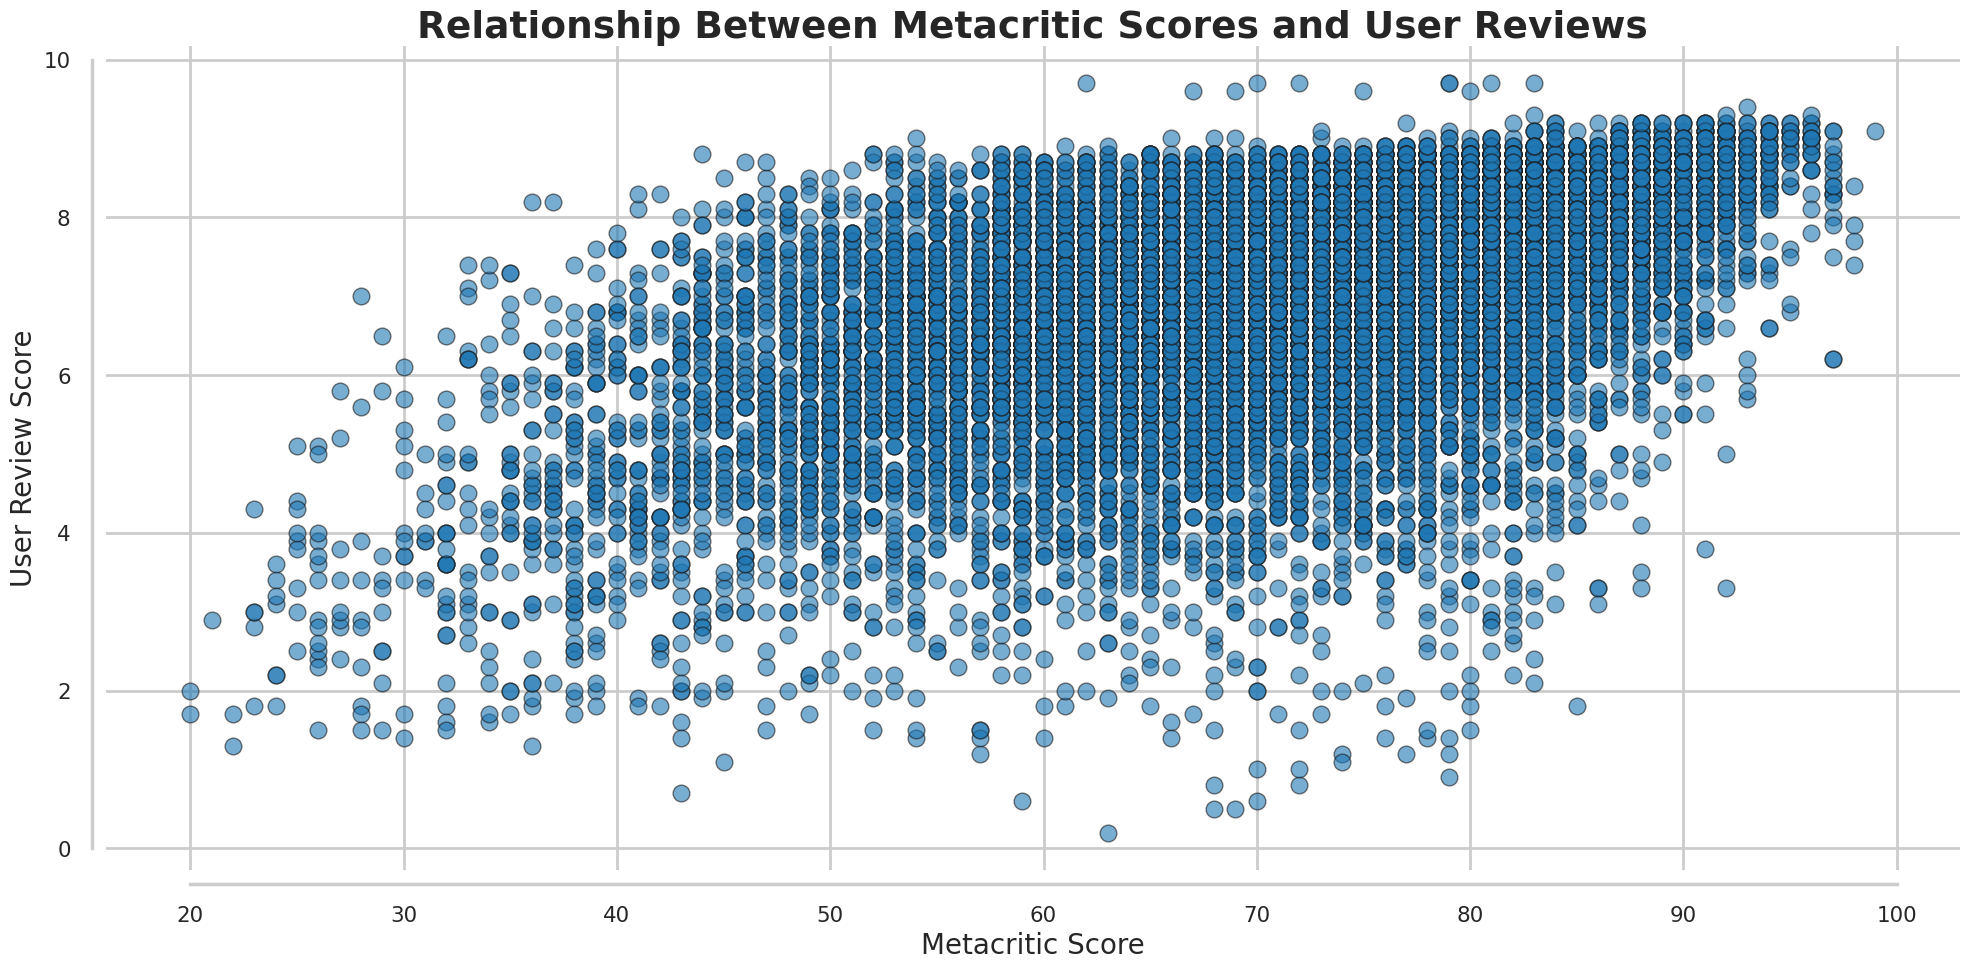

In [25]:
# Relationship between Metacritic Scores and User Reviews
plt.figure(figsize=(20, 10))
p = sns.scatterplot(
    x='meta_score',
    y='user_review',
    data=gm_df,
    alpha=0.6,
    edgecolor="#1c1c1c",
    linewidth=1
)
# Setting plot title
p.set_title("Relationship Between Metacritic Scores and User Reviews", fontsize=27, fontweight='bold')
p.set_xlabel("Metacritic Score", fontsize=20)
p.set_ylabel("User Review Score", fontsize=20)

# Additional styling
sns.despine(trim=True, offset=10)
plt.tight_layout()
plt.show()

**Insights** :

This scatterplot explores the relationship between Metacritics scores(professional critics) and user reviews. Each point represents a game, with its position indicating its score in both categories.



**Correlation**: A pattern in the scatterplot can suggest a correlation between professional ratings and user opinions. A positive correlation would imply that generally, games rated highly by critics are also well received bt users.




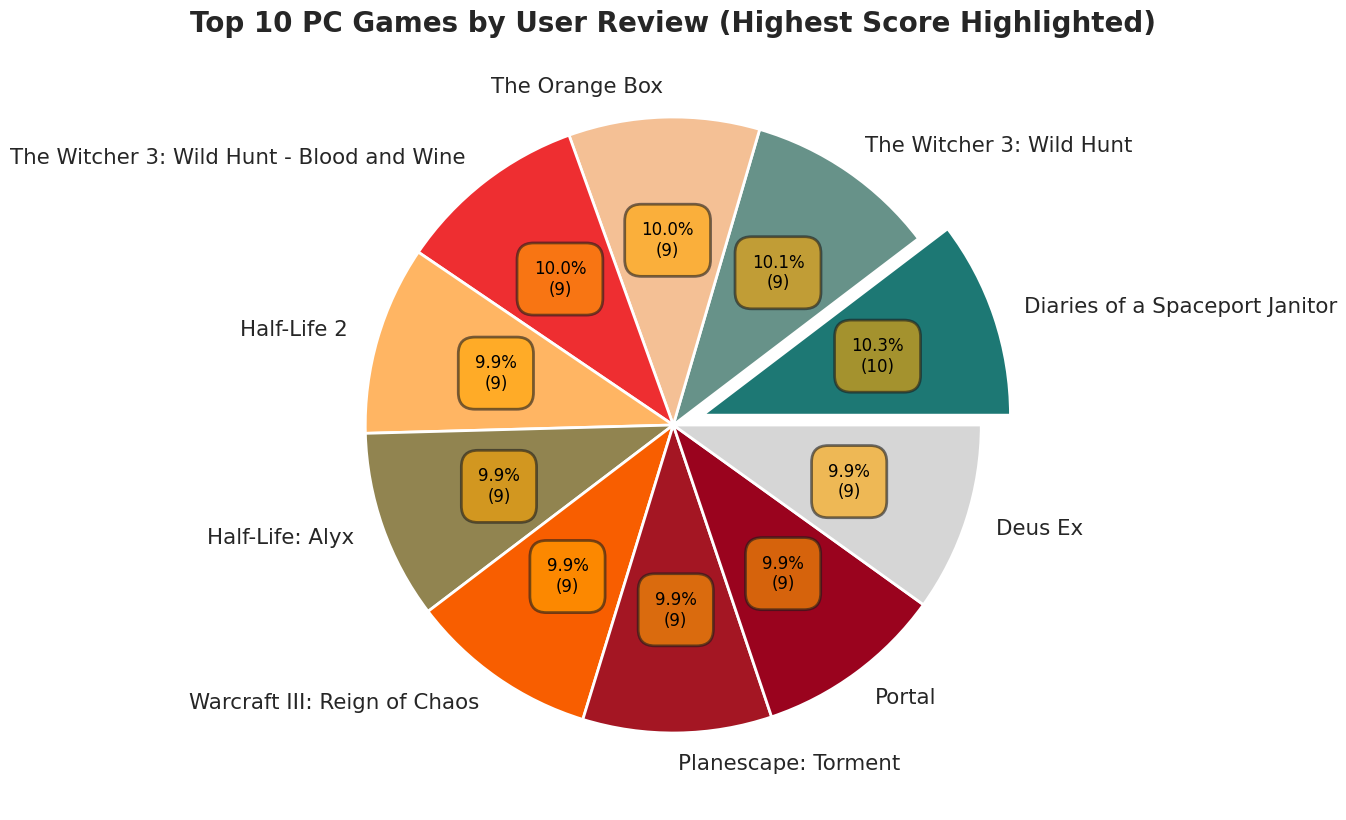

In [41]:
# Top 10 game played on PC based on user's review
pc_games = gm_df[gm_df['platform'].str.contains("PC", case=False)]
top_10_pc_games = pc_games.nlargest(10, 'user_review')

# explode(highest pie out) from the rest pie
explode = [0.1 if i == top_10_pc_games['user_review'].idxmax() else 0 for i in top_10_pc_games.index]

# Function for autopct to return both percentage and user review score
def custom_autopct(pct):
    total = sum(top_10_pc_games['user_review'])
    value = int(round(pct*total/100.0))
    return f'{pct:.1f}%\n({value})'

# Plotting the pie chart
plt.figure(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(top_10_pc_games['user_review'], labels=top_10_pc_games['name'],
                                   colors=palette[:10], autopct=custom_autopct, explode=explode)

plt.title("Top 10 PC Games by User Review (Highest Score Highlighted)", fontsize=20, fontweight='bold')

# Adjust the position of the percentage labels
for text, autotext in zip(texts, autotexts):
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_bbox(dict(boxstyle="round", pad=1.0, facecolor="orange", edgecolor="#1c1c1c", linewidth=2, alpha=0.6))

plt.show()

**Insights** :



*   Diaries of a Spaceport Janitor is famous game played on PC because the game
offers a distinctive experience by putting players in the role of a janitor at a bustling spaceport, rather than a conventional hero or adventurer. This unusual perspective, combined with the game's vibrant and detailed alien setting, offers a fresh take on the sci-fi genre.


*   It touches on themes like economic struggle, the desire for a better life, and the challenges of living in a society that doesn't always value your contributions. These themes are thoughtfully integrated into the gameplay and narrative, making the game not just entertaining, but also thought-provoking.




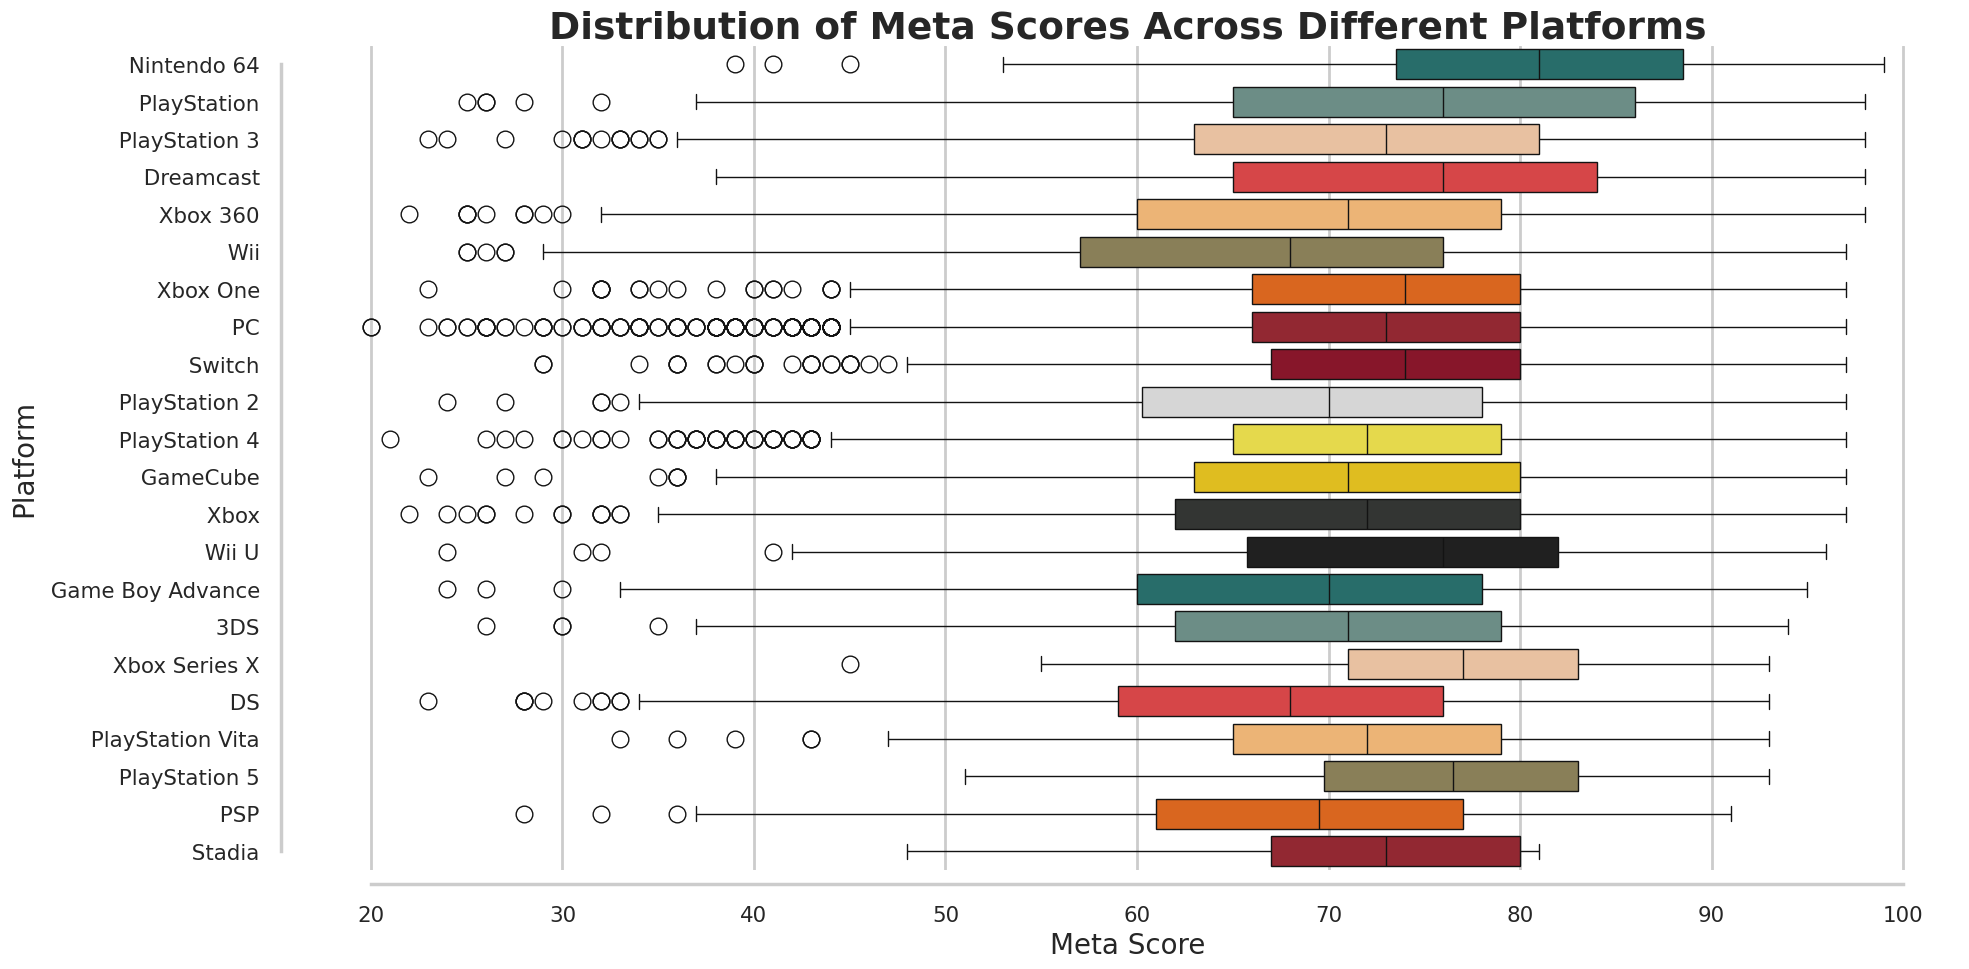

In [51]:
# Boxplot of distribution of Metascore with different platform
plt.figure(figsize=(20, 10))

# Setting plot and title
sns.boxplot(y='platform', x='meta_score', data=gm_df, palette=palette)
plt.yticks(fontsize=14)
plt.title("Distribution of Meta Scores Across Different Platforms", fontsize=27, fontweight='bold')
plt.ylabel("Platform", fontsize=20)
plt.xlabel("Meta Score", fontsize=20)

# Additional styling
sns.despine(trim=True, offset=10)
plt.tight_layout()
plt.show()

**Insights** :



*no insight yet

## **Conclusion: Unveiling the Digital Chronicles**

Our expedition, guided by Python's analytical prowess, has been more than just a data dive. It's been a thrilling exploration, unveiling hidden treasures of knowledge, and connecting us to the heart of the gaming culture. In these pixelated landscapes, we've found not just numbers, but the beating heart of countless narratives and the shared experiences of gamers across generations.

In the end, our conclusion is but a pause in this grand adventure, and the digital chronicles will continue to unfold, inspiring generations to come to explore, create, and revel in the endless possibilities of the gaming universe.